# Aberdeen Python - Dec 2019 - Level 3

by Lee Christie (@leechristie on GitHub)

## Basic Version - Goes Through All Rows

`combine_pairwise` takes two numbers and caclulates the number below acording to the rule in the puzzle, e.g.

    >>> combine_pairwaise(0, 2):
    1

In [12]:
def combine_pairwise(x, y):
    return [[0, 2, 1],
            [2, 1, 0],
            [1, 0, 2]][x][y]

`next_row` takes an entire row and returns the next row e.g.

    >>> next_row([2, 2, 0, 1, 1, 0, 0, 1, 0, 1])
    [2, 1, 2, 1, 2, 0, 2, 2, 2]
 
It uses `combine_pairwise` repeatedly on each adjacent pair.

In [13]:
def next_row(row):
    return [combine_pairwise(row[i], row[i+1]) for i in range(len(row) - 1)]

`print_triangle` uses `next_row` repeatedly on each row until we are down to a sinlge number, printing each row.

In [14]:
# Prints the triangle for a given first row
def print_triangle(row):
    print(' '.join((str(e) for e in row)))
    row_num = 1
    while len(row) > 1:
        row = next_row(row)
        print(' ' * row_num, end='')
        print(' '.join((str(e) for e in row)))
        row_num += 1

Testing the `print_triangle` function:

In [15]:
print_triangle([2, 2, 0, 1, 1, 0, 0, 1, 0, 1])

2 2 0 1 1 0 0 1 0 1
 2 1 2 1 2 0 2 2 2
  0 0 0 0 1 1 2 2
   0 0 0 2 1 0 2
    0 0 1 0 2 1
     0 2 2 1 0
      1 2 0 2
       0 1 1
        2 1
         0


`get_last_number` takes a row and returns the number at the bottom corner of the triangle.

It does this the obvious way of going through each row until it gets to the last.

In [16]:
def get_last_number(row):
    while len(row) > 1:
        row = next_row(row)
    return row[0]

Testing `get_last_number`:

In [17]:
get_last_number([2, 2, 0, 1, 1, 0, 0, 1, 0, 1])

0

## Fancy Version - Uses Shortcut and Recursion

The short-cut of using only the top two two numbers works if the length of the triangle minus 1 is a power of 3.

This function tells us if n is such a length.

In [18]:
def is_one_up_from_a_power_of_3(n):
    m = 1
    if n == m + 1:
        return True
    while m < n:
        m *= 3
        if n == m + 1:
            return True
    return False

This function tells us what number equal two or lower than a given number is such a length.

In [19]:
def largest_magic_number_available(n):
    m = 1
    largest = None
    while m + 1 <= n:
        largest = m + 1
        m *= 3
    return largest

This is the main part of the implmentation, for a given triangle, it returns the value at a given co-ordinate, so if we have `x=5`, `y=2` then we are in the 3rd row (`y=2` and we count from `0`) and the 6th number along from the left (`x=5` and we count from `0`).

If `y=0` we just read off the first row.

If based on the value of `y`, we can form a triangle with a magic length form the first row to this row, we do this and pick the top two corners.

Otherwise, we form the largest triangle available for which the short-cut works, and count that number of rows back, then recursively call the function at those positions, and when the recursion returns combine those two values.

In [20]:
def get_number_at(x, y, row):
    
    # If we are asking about the top row
    if y == 0:
        
        # Just return the value
        return row[x]
    
    # Any other row
    else:
        
        # Size of sub-triangle
        n = y + 1
    
        # Use the short-cut on the full size
        if is_one_up_from_a_power_of_3(n):
        
            # Get the numbers from the top row
            top_left = row[x]
            top_right = row[x+y]
        
        # Don't use the short-cut
        else:

            # How large of a new sub-triangle can we construct?
            m = largest_magic_number_available(n)
            
            # Get the numbers from recursive call (m-1) rows back
            top_left = get_number_at(x, y - (m - 1), row)
            top_right = get_number_at(x + (m - 1), y - (m - 1), row)
    
        # Combine the two values
        return combine_pairwise(top_left, top_right)

This is just a wrapper to access the bottom corner.

In [ ]:
# Fast recursive version of get_last_number
def get_last_number_fast(row):
    return get_number_at(0, len(row)-1, row)

Testing `get_last_number_fast`:

In [21]:
get_last_number_fast([2, 2, 0, 1, 1, 0, 0, 1, 0, 1])

0

Running many times to check how long it takes:

In [39]:
from random import randint
from time import time
from tqdm.notebook import tqdm

NUM_SAMPLES = 1000

runtimes = [None] * 101
runtimes_fast = [None] * 101

for n in tqdm(range(1, 101)):

    start = time()
    for i in range(NUM_SAMPLES):
        row = [randint(0, 2) for _ in range(n)]
        get_last_number(row)
    runtimes[n] = (time() - start) / NUM_SAMPLES

    start = time()
    for i in range(NUM_SAMPLES):
        row = [randint(0, 2) for _ in range(n)]
        get_last_number_fast(row)
    runtimes_fast[n] = (time() - start) / NUM_SAMPLES

And plotting the results:

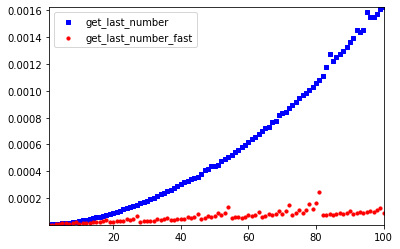

In [41]:
import matplotlib.pyplot as plt

xs = list(range(1, 101))
ys1 = runtimes[1:]
ys2 = runtimes_fast[1:]

minimum = min((min(ys1), min(ys2)))
maximum = max((max(ys1), max(ys2)))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xs, ys1, s=10, c='b', marker="s", label='get_last_number')
ax1.scatter(xs, ys2, s=10, c='r', marker="o", label='get_last_number_fast')

plt.axis([1, 100, minimum, maximum])

plt.legend(loc='upper left');
plt.show()